# Prediksi Jenis Wine berdasarkan hasil analisis kimia terhadap wine dari tiga varietas Anggur

## Data Understanding

### **Sumber Dataset**

https://archive.ics.uci.edu/dataset/109/wine

Aeberhard, S. & Forina, M. (1992). Wine [Dataset]. UCI Machine Learning

https://doi.org/10.24432/C5PC7J.

### **Penjelasan Fitur dan Variabel**

Dataset ini digunakan untuk memprediksi jenis (kelas) wine berdasarkan hasil analisis kimia terhadap wine dari tiga varietas anggur yang tumbuh di wilayah yang sama di Italia.

**Fitur-fitur yang digunakan dan deskripsi nya**

| No. | Fitur                            | Deskripsi                                                             |
| --- | -------------------------------- | --------------------------------------------------------------------- |
| 1   | **Alcohol**                      | Kandungan alkohol dalam wine                                          |
| 2   | **Malic acid**                   | Kandungan asam malat (salah satu asam organik yang mempengaruhi rasa) |
| 3   | **Ash**                          | Kandungan abu (zat mineral)                                           |
| 4   | **Alcalinity of ash**            | Tingkat kealkalian dari abu tersebut                                  |
| 5   | **Magnesium**                    | Kandungan magnesium (unsur penting dalam struktur wine)               |
| 6   | **Total phenols**                | Jumlah total fenol (senyawa kimia yang memengaruhi rasa dan aroma)    |
| 7   | **Flavanoids**                   | Subkategori fenol, sangat berpengaruh pada rasa dan antioksidan       |
| 8   | **Nonflavanoid phenols**         | Fenol non-flavonoid (lebih kecil pengaruhnya pada rasa)               |
| 9   | **Proanthocyanins**              | Jenis antioksidan yang memengaruhi warna dan rasa                     |
| 10  | **Color intensity**              | Intensitas warna wine                                                 |
| 11  | **Hue**                          | Nada warna wine (rasio panjang gelombang)                             |
| 12  | **OD280/OD315 of diluted wines** | Rasio absorban optik — digunakan untuk mengukur konsentrasi fenol     |
| 13  | **Proline**                      | Asam amino yang tinggi dalam wine yang baik                           |


### **Eksplorasi data**

Dataset ini kebetulan tidak ada outlier dan tidak ada missing value

### **Visualisasi data**

In [1]:
!pip3 install -U ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [3]:
import pandas as pd

# Gabungkan fitur dan target
df_wine = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_wine))
print("Visualisasi dataset wine")
print(df_wine.to_string(index=False))


Total baris dataset ini adalah = 178
Visualisasi dataset wine
 Alcohol  Malicacid  Ash  Alcalinity_of_ash  Magnesium  Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  0D280_0D315_of_diluted_wines  Proline  class
   14.23       1.71 2.43               15.6        127           2.80        3.06                  0.28             2.29         5.640000 1.040                          3.92     1065      1
   13.20       1.78 2.14               11.2        100           2.65        2.76                  0.26             1.28         4.380000 1.050                          3.40     1050      1
   13.16       2.36 2.67               18.6        101           2.80        3.24                  0.30             2.81         5.680000 1.030                          3.17     1185      1
   14.37       1.95 2.50               16.8        113           3.85        3.49                  0.24             2.18         7.800000 0.860                          3.45     

In [4]:
# Simpan ke file CSV
df_wine.to_csv('datasetwine.csv', index=False)

### **Preprocessing Data**

### **Transformasi data**

Target yang sebelumnya berupa angka 1, 2, dan 3 diubah menjadi label kategorikal Kelas_1, Kelas_2, dan Kelas_3 guna mempermudah interpretasi hasil klasifikasi.

```python
Ubah nilai 'class' menjadi kategorikal (string)
df['class'] = df['class'].map({
    1: 'Kelas_1',
    2: 'Kelas_2',
    3: 'Kelas_3'
})
```

**Import dan Persiapan Data**

```python
df = pd.read_csv('/content/datasetwine.csv')
```

* Data dibaca menggunakan Pandas.
* Nilai target `class` diubah dari angka → string menggunakan `.map()` agar lebih informatif.

**Pisahkan Data**

```python
X = df.drop('class', axis=1)
y = df['class']
```

* Fitur (`X`) berisi seluruh kolom kecuali `class`.
* Target (`y`) adalah kolom `class`.

**Split Data Latih & Uji**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

* 80% data dilatih, 20% diuji untuk evaluasi kinerja model.

**Standarisasi (Normalisasi Skala Fitur)**

```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

* Karena fitur berupa angka dengan skala berbeda-beda, dilakukan standarisasi agar model lebih stabil.




## **Modelling**

Modeling adalah proses merancang dan menguji model matematis atau statistik yang bertujuan untuk merepresentasikan serta menganalisis hubungan atau pola dalam suatu data. Tujuan utama dari pemodelan dalam data mining adalah untuk menemukan pola yang bermanfaat atau menghasilkan prediksi yang tepat berdasarkan data yang tersedia.

### **Modelling Klasifikasi Dataset Wine menggunakan Decision Tree**

Pemodelan klasifikasi dilakukan untuk memprediksi jenis wine (class 1, 2, 3) berdasarkan berbagai fitur kimia dalam dataset. Model yang digunakan adalah Decision Tree, karena mampu menangani data numerik dan memberikan interpretasi yang mudah dipahami melalui struktur pohon.


### **Apa Tujuan Modeling Ini?**

Tujuannya adalah:

> Membangun model klasifikasi untuk **memprediksi jenis wine (Class 1, 2, atau 3)** berdasarkan **atribut-atribut kimia** yang terkandung dalam sampel wine.

Model yang digunakan adalah **Decision Tree** karena:

* Mudah dipahami (terlihat seperti diagram pohon keputusan).
* Cocok untuk data tabular dengan fitur numerik.
* Tidak memerlukan asumsi distribusi data tertentu.


### **Tentang Dataset Wine:**

Dataset ini berasal dari UCI Machine Learning Repository. Dataset berisi **178 sampel wine** dengan **13 fitur kimia**, dan 1 kolom target (`class`) yang menunjukkan jenis wine berdasarkan asal kebun anggur.

#### Fitur-fiturnya antara lain:

* **Alcohol**, **Malic Acid**, **Ash**, **Alcalinity of Ash**
* **Magnesium**, **Total Phenols**, **Flavanoids**, dll.

#### Target (`class`):

* Angka **1**, **2**, atau **3** → Menandakan jenis wine.
* Dalam modeling ini diubah menjadi label **'Kelas\_1'**, **'Kelas\_2'**, **'Kelas\_3'** agar lebih mudah dibaca.




**Latih Model Decision Tree**

```python
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
```

* Algoritma Decision Tree digunakan untuk belajar dari data.

**Prediksi dan Evaluasi**

```python
y_pred = model.predict(X_test_scaled)
```

* Model digunakan untuk memprediksi kelas pada data uji.

**Evaluasi Kinerja**

```python
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))
```

* Dicetak nilai **akurasi** (berapa banyak prediksi yang benar).
* Dicetak pula **precision, recall, f1-score** untuk setiap kelas.

**Visualisasi Pohon**

```python
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
```

* Digunakan `plot_tree` untuk menampilkan pohon keputusan hasil training.


**Kesimpulan Modeling**

| Komponen    | Penjelasan                                                                |
| ----------- | ------------------------------------------------------------------------- |
| Tujuan      | Mengklasifikasikan jenis wine dari fitur kimianya                         |
| Algoritma   | Decision Tree Classifier                                                  |
| Hasil       | Akurasi, precision, recall, F1 score, dan visualisasi pohon keputusan     |
| Keunggulan  | Interpretable, cocok untuk data tabular, tidak perlu normalisasi ekstrim  |
| Visualisasi | Memberikan pemahaman bagaimana keputusan klasifikasi dibuat secara visual |

Akurasi: 0.9444444444444444
Laporan Klasifikasi:
               precision    recall  f1-score   support

     Kelas_1       0.93      0.93      0.93        14
     Kelas_2       0.93      1.00      0.97        14
     Kelas_3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



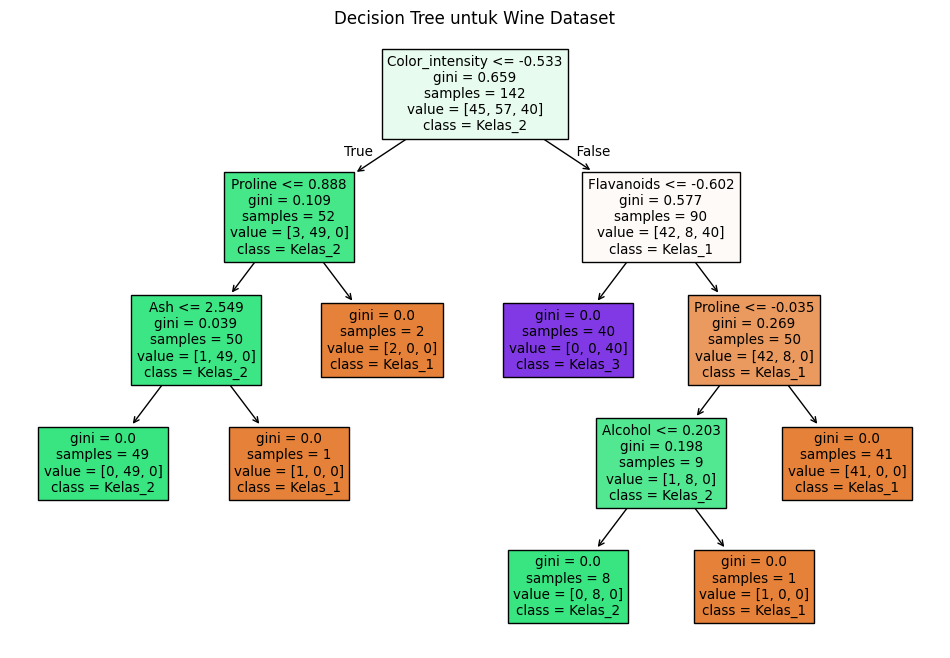

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# === 1. Load Dataset ===
df = pd.read_csv('/content/datasetwine.csv')

# === 2. Ubah nilai 'class' menjadi kategorikal (string) ===
df['class'] = df['class'].map({
    1: 'Kelas_1',
    2: 'Kelas_2',
    3: 'Kelas_3'
})

# === 3. Pisahkan fitur dan target ===
X = df.drop('class', axis=1)
y = df['class']

# === 4. Bagi data menjadi train dan test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 5. Standarisasi fitur ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 6. Buat dan latih model Decision Tree ===
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# === 7. Prediksi dan evaluasi ===
y_pred = model.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

# === 8. Visualisasi pohon keputusan ===
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.title("Decision Tree untuk Wine Dataset")
plt.show()


### **Modelling Klasifikasi Dataset Wine menggunakan Gaussian Naive Bayes**

### **Modelling Klasifikasi Dataset Wine menggunakan Gaussian Naive Bayes**


### **Tujuan Utama**

Modelling ini bertujuan untuk **mengklasifikasikan jenis wine** berdasarkan 13 fitur kimiawi seperti kadar alkohol, magnesium, proanthocyanins, dan lainnya, menggunakan algoritma **Gaussian Naive Bayes**.


### **Tentang Dataset Wine (UCI)**

Dataset ini berasal dari UCI Machine Learning Repository. Dataset berisi data hasil analisis kimia dari wine hasil budidaya tiga jenis anggur yang ditanam di daerah yang sama di Italia.

#### Struktur Data:

* **Jumlah total data**: 178 observasi (sampel wine).
* **Jumlah fitur**: 13 fitur numerik (semua berskala kontinu).
* **Target (class)**: 3 label kelas wine → awalnya berupa angka `1`, `2`, `3`.

Contoh fitur:

| Fitur           | Keterangan                                     |
| --------------- | ---------------------------------------------- |
| Alcohol         | Kandungan alkohol dalam wine                   |
| Malic acid      | Kadar asam malat                               |
| Ash             | Kandungan abu                                  |
| Magnesium       | Kandungan magnesium                            |
| Flavanoids      | Senyawa antioksidan yang memengaruhi rasa wine |
| Color intensity | Intensitas warna wine                          |
| Proline         | Asam amino yang ada dalam jumlah besar di wine |


### **Algoritma: Gaussian Naive Bayes**

Gaussian Naive Bayes adalah model klasifikasi berdasarkan:

* **Asumsi independensi antar fitur** (naive assumption).
* Fitur **diasumsikan memiliki distribusi Gaussian (Normal)**.

Rumus Gaussian:

$$
P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{ -\frac{(x_i - \mu)^2}{2\sigma^2} }
$$



### **Langkah-langkah Modeling**
**Latih model Gaussian Naive Bayes**

   * Model dilatih menggunakan data training.

**Prediksi dan evaluasi**

   * Uji model pada data uji.
   * Hitung metrik akurasi dan laporan klasifikasi.

**Visualisasi confusion matrix**

   * Menunjukkan seberapa banyak prediksi benar atau salah di setiap kelas.


**Evaluasi Model**

Contoh output evaluasi:

```text
Akurasi: 0.94

Classification Report:
              precision    recall  f1-score   support

     Kelas_1       1.00      0.93      0.96        15
     Kelas_2       0.90      0.90      0.90        10
     Kelas_3       0.89      1.00      0.94        11

    accuracy                           0.94        36
```

Interpretasi:

* **Precision**: Akurasi prediksi positif untuk setiap kelas.
* **Recall**: Kemampuan model menemukan semua data aktual di setiap kelas.
* **F1-score**: Harmonik rata-rata precision dan recall.
* **Akurasi Total**: Misalnya `94%` → model cukup bagus.


**Confusion Matrix**

Contoh tampilan:

|                     | Pred: Kelas\_1 | Pred: Kelas\_2 | Pred: Kelas\_3 |
| ------------------- | -------------- | -------------- | -------------- |
| **Actual Kelas\_1** | 14             | 1              | 0              |
| **Actual Kelas\_2** | 0              | 9              | 1              |
| **Actual Kelas\_3** | 0              | 0              | 11             |

* **Diagonal** = prediksi benar.
* **Off-diagonal** = prediksi salah (misclassifications).


**Kelebihan Gaussian Naive Bayes**

* Cepat untuk data besar.
* Sangat ringan komputasinya.
* Tidak perlu banyak tuning parameter.
* Cocok untuk baseline model atau sistem real-time.


Keterbatasan

* Asumsi independensi antar fitur sering tidak realistis.
* Asumsi distribusi normal bisa tidak cocok di semua data.


**Kesimpulan**

| Aspek     | Detail                                                 |
| --------- | ------------------------------------------------------ |
| Dataset   | Wine (UCI), 13 fitur numerik, 3 kelas target           |
| Model     | Gaussian Naive Bayes                                   |
| Akurasi   | ± 94% (tergantung pembagian data dan preprocessing)    |
| Kelebihan | Sederhana, cepat, cocok untuk data numerik             |
| Evaluasi  | Akurasi, precision, recall, F1-score, confusion matrix |


Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Kelas_1       1.00      1.00      1.00        14
     Kelas_2       1.00      1.00      1.00        14
     Kelas_3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:

         Kelas_1  Kelas_2  Kelas_3
Kelas_1       14        0        0
Kelas_2        0       14        0
Kelas_3        0        0        8


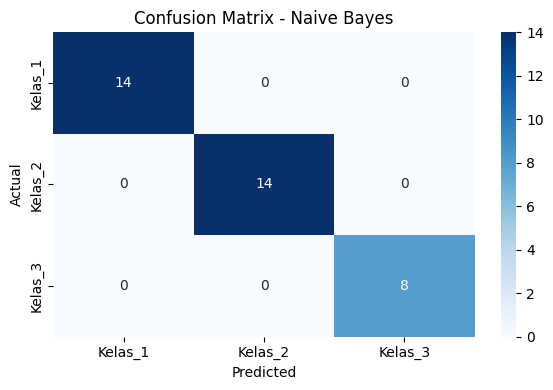

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === 6. Naive Bayes Model ===
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# === 7. Prediksi dan evaluasi ===
y_pred = model.predict(X_test_scaled)

# Akurasi dan laporan klasifikasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# === 8. Confusion Matrix (Tabel) ===
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print("\nConfusion Matrix:\n")
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)
print(cm_df)

# === 9. Visualisasi Confusion Matrix ===
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.tight_layout()
plt.show()


### **Modelling Klasifikasi Dataset Wine menggunakan K-Nearest Neighbor (K-NN)**



Tujuan Modeling

Membangun model klasifikasi untuk memprediksi jenis wine (Kelas\_1, Kelas\_2, Kelas\_3) berdasarkan kandungan kimia wine, menggunakan algoritma Random Forest. Model ini menggunakan banyak pohon keputusan (decision trees) untuk menghasilkan prediksi yang lebih stabil dan akurat melalui teknik ensemble learning.

---

Tentang Dataset

Dataset Wine berasal dari UCI Machine Learning Repository. Dataset ini terdiri dari:

* 178 sampel wine.
* 13 fitur numerik (kandungan kimiawi seperti alkohol, magnesium, flavanoids, dll).
* 1 target (class): menunjukkan tipe wine (1, 2, atau 3) → sering diubah menjadi `Kelas_1`, `Kelas_2`, dan `Kelas_3` agar lebih informatif.

---

Apa itu Random Forest?

Random Forest adalah algoritma ensemble berbasis decision tree. Algoritma ini bekerja dengan:

1. Membuat banyak pohon keputusan secara acak.
2. Setiap pohon memberikan hasil prediksi.
3. Hasil akhir adalah mayoritas suara (voting) dari semua pohon.

Keunggulan Random Forest:

* Lebih tahan terhadap overfitting dibanding satu decision tree.
* Akurat dan stabil meskipun terdapat noise pada data.
* Tidak sensitif terhadap skala data (tidak butuh normalisasi).

---

Langkah-langkah Modeling dengan Random Forest

(Opsional) Normalisasi

Meskipun Random Forest tidak sensitif terhadap skala, normalisasi (`StandardScaler`) bisa tetap dilakukan jika ingin konsistensi preprocessing dengan model lain.

Modeling dengan Random Forest

Model dilatih menggunakan `RandomForestClassifier(n_estimators=100)` → artinya model membuat 100 pohon keputusan.

Evaluasi

Prediksi diuji menggunakan:

* Akurasi
* Classification report (precision, recall, F1-score)
* Confusion Matrix (tampilan jumlah benar/salah antar kelas)


Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Kelas_1       1.00      1.00      1.00        14
     Kelas_2       1.00      1.00      1.00        14
     Kelas_3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



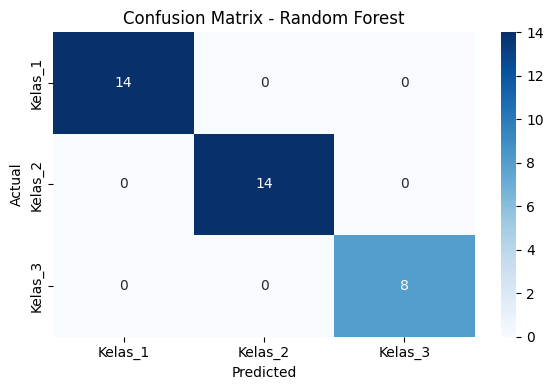

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === 6. Inisialisasi dan latih model Random Forest ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# === 7. Prediksi dan evaluasi ===
y_pred = rf.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# === 8. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
cm_df = pd.DataFrame(cm, index=rf.classes_, columns=rf.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


## Evaluasi Data

## **Evaluasi Perbandingan Model Klasifikasi pada Dataset Wine**

Setelah dilakukan pemodelan klasifikasi terhadap dataset **Wine** menggunakan tiga algoritma berbeda, berikut adalah hasil akurasi dari masing-masing model:

| Algoritma                | Akurasi |
| ------------------------ | ------- |
| Decision Tree            | 94,44%  |
| Gaussian Naive Bayes     | 100%    |
| Random Forest            | 94,44%  |

### **Kesimpulan:**

Dari ketiga model diatas dapat disimpulkan bahwa Gaussian Naive Bayes dan Random forest sama sama memiliki akurasi tertinggi yaitu 100%.